### Reading binary files from Incompact3d using NumPy fromfile function

In [54]:
import numpy as np

**Ux component**

In [55]:
ux = np.fromfile("../Incompact3d/examples/Taylor-Green-Vortex/data/ux-001.bin")

In [3]:
ux

array([0.        , 0.15502693, 0.28898958, ..., 0.32725447, 0.17148604,
       0.        ])

In [4]:
ux.shape

(274625,)

In [57]:
ux = ux.reshape(65,65,65)
ux.shape

(65, 65, 65)

**Uy & Uz components**

In [56]:
uy = np.fromfile("../Incompact3d/examples/Taylor-Green-Vortex/data/uy-004.bin")
uz = np.fromfile("../Incompact3d/examples/Taylor-Green-Vortex/data/uz-004.bin")

In [58]:
uy = uy.reshape(65,65,65)
uz = uy.reshape(65,65,65)

In [8]:
uy.shape

(65, 65, 65)

In [9]:
uz.shape

(65, 65, 65)

### Plot data

In [59]:
%matplotlib widget
import matplotlib.pyplot as plt

**Create mesh grid for X & Y**

In [60]:
x = np.linspace(0,3.14159265358979,65)
y = np.linspace(0,3.14159265358979,65)
z = np.linspace(0,3.14159265358979,65)
X,Y = np.meshgrid(x,y,indexing='ij')

**Calculate Velocity Magnitude of ux & uy components (if you want to plot this**

In [61]:
Uxy = np.sqrt(ux**2 + uy**2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
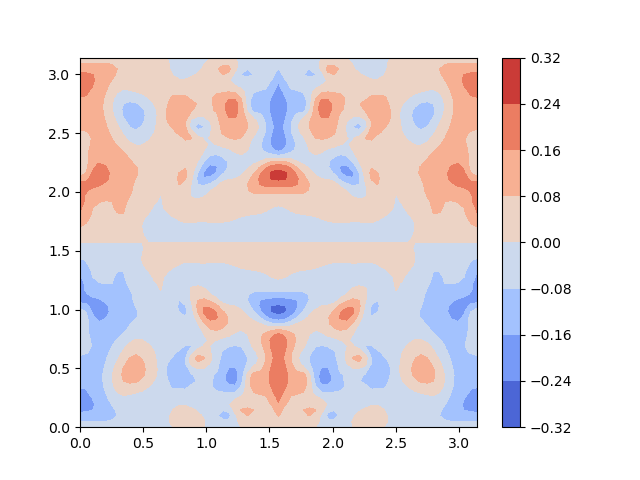

In [62]:
fig = plt.figure()
plt.contourf(X,Y,uy[:,:,32], cmap='coolwarm')
plt.colorbar()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
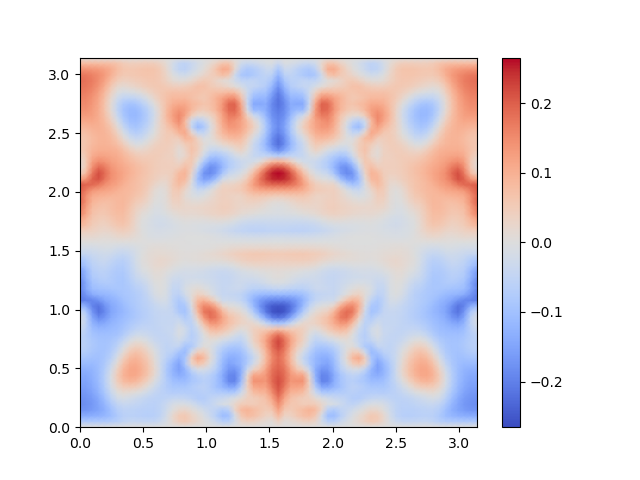

In [63]:
fig = plt.figure()
plt.pcolormesh(X,Y,uy[:,:,32], cmap='coolwarm', shading='gouraud')
plt.colorbar()

Looks similar to data in Paraview!

<img src="./paraview_comparison.PNG"  alt="drawing" width="500">

### Add all timesteps to u variables

Set mesh parameters

In [46]:
nx = 65
ny = 65
nz = 65
num_t = 4

In [47]:
ux = np.empty((nx,ny,nz,num_t))
uy = np.empty((nx,ny,nz,num_t))
uz = np.empty((nx,ny,nz,num_t))
ux.shape

(65, 65, 65, 4)

### Read all data at once

In [48]:
for i in range(0,4):
    idx = i+1
    ux_read = np.fromfile(f"../Incompact3d/examples/Taylor-Green-Vortex/data/ux-00{idx}.bin")
    uy_read = np.fromfile(f"../Incompact3d/examples/Taylor-Green-Vortex/data/uy-00{idx}.bin")
    uz_read = np.fromfile(f"../Incompact3d/examples/Taylor-Green-Vortex/data/uz-00{idx}.bin")
    
    ux_reshape = ux_read.reshape(65,65,65)
    uy_reshape = uy_read.reshape(65,65,65)
    uz_reshape = uz_read.reshape(65,65,65)

    ux[:,:,:,i] = ux_reshape
    uy[:,:,:,i] = uy_reshape
    uz[:,:,:,i] = uz_reshape
    
    print(i)
#ux = ux.reshape(65,65,65,4)

0
1
2
3


In [110]:
ux.shape

(65, 65, 65, 4)

In [51]:
uz[:,:,:,3]

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.10967856,  0.10998191,  0.11010085, ...,  0.01082617,
          0.06862362,  0.10967856],
        [ 0.06862362,  0.06960549,  0.07214926, ...,  0.0123715 ,
          0.06960549,  0.10998191],
        [ 0.01082617,  0.0123715 ,  0.01655247, ...,  0.01655247,
          0.07214926,  0.11010085],
        ...,
        [ 0.11010085,  0.07214926,  0.01655247, ...,  

# Dev

In [154]:
a = np.linspace(1,64,64)
a

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [155]:
a.shape

(64,)

In [157]:
a_new = a.reshape(2,4,8)
a_new.shape

(2, 4, 8)

In [159]:
a_new2 = a_new.transpose()
a_new2.shape

(8, 4, 2)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
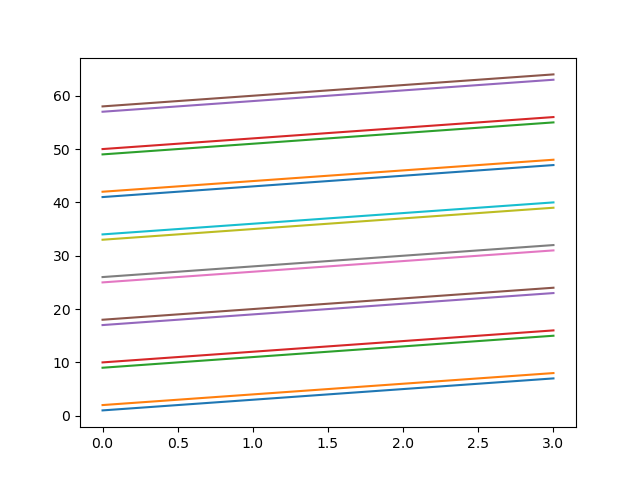

In [98]:
fig = plt.figure()
for line in a_new:
    plt.plot(line)